# Image Processing Summary
Author: Melissa

This NB uses the file archive_image_list.txt, which was generated for all images from both 2021A-0113 and 2021B-0149 in the NOIRLab Data Archive.

**Class:** MLG has assigned all archive images a "class", as follows.<br>
Some images were obtained with a different exposure time and are not "standard".

`| Image Class  | filters | exposure times |     |`<br>
`| COSMOS       | g r i   | 60  86  130    | std |`<br>
`| COSMOS-MOON  | g r i   | 60  30  30     |     |`<br>
`| COSMOS-AGN   | g r i   | 80  70  90     |     |`<br>
`| ELAIS        | g r i   | 60  86  130    | std |`<br>
`| DECaPS-East  | g r i z | 96  50  30  30 | std |`<br>
`| DECaPS-West  | g r i z | 96  50  30  30 | std |`<br>

## Set Up

In [1]:
import psycopg2
import psycopg2.extras
import getpass

import os
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from astropy.coordinates import SkyCoord

In [2]:
dbuser = input("DB User: ")
dbpasswd = getpass.getpass("DB Password: ")

DB User:  mgraham
DB Password:  ············


In [3]:
db = psycopg2.connect(f"dbname='decat' user='{dbuser}' password='{dbpasswd}' host='decatdb.lbl.gov'")

In [4]:
cursor = db.cursor( cursor_factory = psycopg2.extras.DictCursor )

In [87]:
### If you want to print table schema
tables = ['exposures','subtractions']
for table in tables:
    query = "SELECT column_name, data_type FROM information_schema.columns WHERE table_name=%s"
    cursor.execute( query, ( table, ))
    print( f"\nTABLE: {table}\n===========================" )
    for row in cursor:
        print( f"{row['column_name']:24s}  :  {row['data_type']:s}" )


TABLE: exposures
id                        :  integer
created_at                :  timestamp without time zone
modified                  :  timestamp without time zone
ra                        :  double precision
dec                       :  double precision
gallat                    :  double precision
gallong                   :  double precision
header                    :  jsonb
filename                  :  text
mjd                       :  double precision
event_name                :  text
filter                    :  text
proposalid                :  text
graceid                   :  text
is_stack                  :  boolean
camera_id                 :  integer

TABLE: subtractions
id                        :  integer
created_at                :  timestamp without time zone
modified                  :  timestamp without time zone
ra                        :  double precision
dec                       :  double precision
header                    :  jsonb
ra1                    

<br>
<br>

## Exposures and subtractions tables, and NOIRLab archive image list

### exposures table
put selected columns into numpy arrays

In [32]:
query = "SELECT id, ra, dec, filename, mjd, filter, proposalid, header FROM exposures"
cursor.execute( query )
results = np.array( cursor.fetchall() ).transpose()
exp_id  = np.asarray( results[0], dtype='int' )
exp_ra  = np.asarray( results[1], dtype='float' )
exp_dec = np.asarray( results[2], dtype='float' )
exp_fnm = np.asarray( results[3], dtype='str' )
exp_mjd = np.asarray( results[4], dtype='float' )
exp_fil = np.asarray( results[5], dtype='str' )
exp_pid = np.asarray( results[6], dtype='str' )
exp_hdr = np.asarray( results[7], dtype='str' )
del query, results

In [33]:
### exp_fbs : just the filename base (without the extension)
### exp_cal : calendar date
exp_fbs = deepcopy(exp_fnm)
exp_cal = np.zeros( len(exp_fnm), dtype='int' )

for i,fnm in enumerate(exp_fnm):
    tmp1 = fnm.split('.')[0]
    exp_fbs[i] = tmp1
    tmp2 = tmp1.split('_')[1]
    exp_cal[i] = int(tmp2)
    del tmp1,tmp2

print(exp_fnm[0])
print(exp_fbs[0])
print(exp_cal[0])

c4d_211128_043355_ori.fits.fz
c4d_211128_043355_ori
211128


In [34]:
### The header is a string that can be converted to a directory.
# temp = eval(exp_hdr[0])
# temp
# print("temp['AZ'] = ",temp['AZ'])

show map of all exposures

there are no DECaPS fields in the exposures table


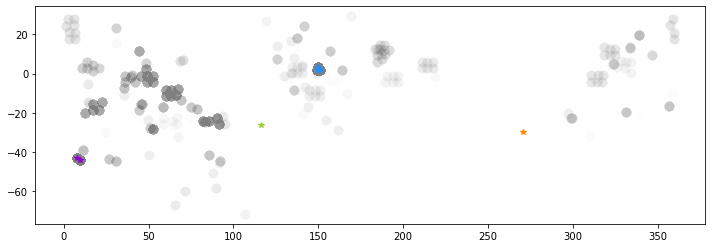

In [35]:
plt.figure(figsize=(12, 4))
plt.plot( exp_ra, exp_dec, 'o', ms=10, alpha=0.01, mew=0, color='grey')

# COSMOS-1     150.0   +3.1
# COSMOS-2     149.22  +1.75
# COSMOS-3     150.78  +1.75
# ELAIS-E1     7.8746  -43.0096
# ELAIS-E2     9.5     -43.9980
# DECaPS-East  270.89  -29.53
# DECaPS-West  116.32  -26.25
   
plt.plot( 150.0 ,  +3.1,     '*', ms=6, alpha=1, color='dodgerblue')
plt.plot( 149.22,  +1.75,    '*', ms=6, alpha=1, color='dodgerblue')
plt.plot( 150.78,  +1.75,    '*', ms=6, alpha=1, color='dodgerblue')
plt.plot( 7.8746,  -43.0096, '*', ms=6, alpha=1, color='darkviolet')
plt.plot( 9.5   ,  -43.9980, '*', ms=6, alpha=1, color='darkviolet')
plt.plot( 270.89,  -29.53,   '*', ms=6, alpha=1, color='darkorange')
plt.plot( 116.32,  -26.25,   '*', ms=6, alpha=1, color='yellowgreen')

print('there are no DECaPS fields in the exposures table')

### subtractions table
put selected columns into numpy arrays

In [36]:
query = "SELECT id, ra, dec, lmt_mg, seeing, skysig, magzp, "+ \
        "ccdnum, image_id, exposure_id FROM subtractions"
cursor.execute( query )
results = np.array( cursor.fetchall() ).transpose()
sub_id  = np.asarray( results[0], dtype='int' )
sub_ra  = np.asarray( results[1], dtype='float' )
sub_dec = np.asarray( results[2], dtype='float' )
sub_lmg = np.asarray( results[3], dtype='float' )
sub_see = np.asarray( results[4], dtype='float' )
sub_sks = np.asarray( results[5], dtype='float' )
sub_mzp = np.asarray( results[6], dtype='float' )
sub_ccd = np.asarray( results[7], dtype='int' )
sub_iid = np.asarray( results[8], dtype='int' )
sub_eid = np.asarray( results[9], dtype='int' )
del query, results

add a few more qualities to the sub_ tables

In [37]:
### sub_fil : the filter of the exposure associated with the subtraction
### sub_mjd : the MJD of the exposure associated with the subtraction
### sub_era : the exposure ra
### sub_ede : the exposure dec
### sub_off : the offset in arcsec of the sub ccd from the image center

sub_fil = np.zeros( len(sub_eid), dtype='str' )
sub_mjd = np.zeros( len(sub_eid), dtype='float' )
sub_era = np.zeros( len(sub_eid), dtype='float' )
sub_ede = np.zeros( len(sub_eid), dtype='float' )
for i in range(len(sub_eid)):
    tx = np.where( exp_id == sub_eid[i] )[0]
    if len(tx) == 1:
        sub_fil[i] = exp_fil[tx[0]]
        sub_mjd[i] = exp_mjd[tx[0]]
        sub_era[i] = exp_ra[tx[0]]
        sub_ede[i] = exp_dec[tx[0]]
    elif len(tx) == 0:
        print('No exposure id match for: ', sub_eid[i])
    elif len(tx) > 1:
        print('More than one exposure id match for: ', sub_eid[i])
    del tx

c1 = SkyCoord(sub_ra,sub_dec,unit="deg")
c2 = SkyCoord(sub_era,sub_ede,unit="deg")
sub_off = c1.separation(c2).arcsec

del sub_era,sub_ede,c1,c2

add a few more qualities to the exposure tables based on the subtraction table data

In [38]:
### exp_mdn_see : median seeing over all subtractions for this exposure
### exp_mdn_lmg : median limiting magnitude over all subtractions for this exposure
### exp_mdn_sks : median skysig over all subtractions for this exposure
### exp_mdn_mzp : median zeropoint over all subtractions for this exposure

exp_mdn_see = np.zeros( len(exp_id), dtype='float' )
exp_mdn_lmg = np.zeros( len(exp_id), dtype='float' )
exp_mdn_sks = np.zeros( len(exp_id), dtype='float' )
exp_mdn_mzp = np.zeros( len(exp_id), dtype='float' )
for i in range(len(exp_id)):
    sx = np.where( sub_eid == exp_id[i] )[0]
    exp_mdn_see[i] = np.median(sub_see[sx])
    exp_mdn_lmg[i] = np.median(sub_lmg[sx])
    exp_mdn_sks[i] = np.median(sub_sks[sx])
    exp_mdn_mzp[i] = np.median(sub_mzp[sx])

/usr/common/software/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/common/software/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


and a few final subtraction table arrays

In [39]:
### sub_rel_see : fraction of subtraction seeing / median seeing for all subs of exp
### sub_rel_lmg : " but for limiting magnitude
### sub_rel_sks : " but for skysig
### sub_rel_mzp : " but for zeropoint

sub_rel_see = np.zeros( len(sub_eid), dtype='float' )
sub_rel_lmg = np.zeros( len(sub_eid), dtype='float' )
sub_rel_sks = np.zeros( len(sub_eid), dtype='float' )
sub_rel_mzp = np.zeros( len(sub_eid), dtype='float' )
for i in range(len(sub_eid)):
    tx = np.where( exp_id == sub_eid[i] )[0]
    sub_rel_see[i] = sub_see[i] / exp_mdn_see[tx[0]]
    sub_rel_lmg[i] = sub_lmg[i] / exp_mdn_lmg[tx[0]]
    sub_rel_sks[i] = sub_sks[i] / exp_mdn_sks[tx[0]]
    sub_rel_mzp[i] = sub_mzp[i] / exp_mdn_mzp[tx[0]]

In [40]:
### Print value ranges for the exposure id, subtraction id, subtraction ccd
# print(np.min(exp_id),np.max(exp_id))
# print(np.min(sub_ccd),np.max(sub_ccd))
# print(np.min(sub_iid),np.max(sub_iid))
# print(np.min(sub_eid),np.max(sub_eid))

In [41]:
### Are there any bad ccds?
### Yes. CCD = 31, 61 have no subtractions
### Known issue: http://www.ctio.noao.edu/noao/node/2630

# usebins = np.arange( 63, dtype='float' ) + 0.5
# plt.hist(sub_ccd, bins=usebins, histtype='step')
# plt.xlabel('CCD Number')
# plt.ylabel('Number of Subtractions')

### Print number of subtractions per CCD as a check
# for i in range(63):
#     tx = np.where( sub_ccd == i )[0]
#     print(i, len(tx))
#     del tx

Show map of RA, Dec of the COSMOS and ELAIS subtractions

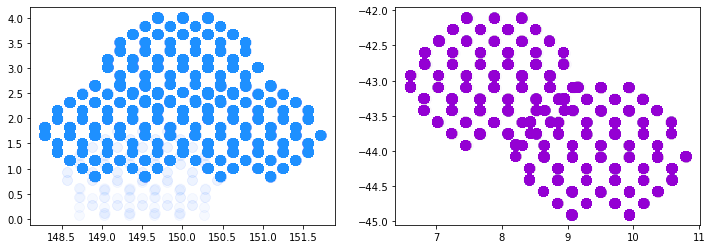

In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
cx = np.where( (sub_ra>145) & (sub_ra<155) & (sub_dec>0.0) & (sub_dec<8.0) )[0]
plt.plot( sub_ra[cx], sub_dec[cx], 'o', ms=10, alpha=0.01, color='dodgerblue')
plt.subplot(1, 2, 2)
ex = np.where( (sub_ra>2.0) & (sub_ra<12.0) & (sub_dec>-48.0) & (sub_dec<-40.0) )[0]
plt.plot( sub_ra[ex], sub_dec[ex], 'o', ms=10, alpha=0.01, color='darkviolet')

### archive image list
read it into numpy arrays

Melissa made this list of all 2021A-0113 and 2021B-0149 images from the NOIRLab Data Archive.

* fbase : base of archive filename (without extension)
* ra, dec : coordinates in decimal degrees
* mjd : modified julian date of observation (at exposure start)
* filt : filter
* airm : airmass
* obj : object name
* expt : exposure time
* seqid : sequence id (relates to JSON file for observing)
* **class : COSMOS, COSMOS-AGN, COSMOS-MOON, ELAIS, DECaPS-East, DECaPS-West, or NONE**
   * -AGN and -MOON indicate non-standard exposure times
   * class = COSMOS, ELAIS, or DECaPS are considered "standard"
* ftype : field type, EGAL, GAL, or NONE
* moonsep : moon separation in degrees
* moonill : moon illumination as a fraction
* mpval : 0.2 quantile sky background value for central chip (for images with moonsep<60 and moonill>0.2)

Recall that mpval used to be just the median image pixel value for images with moonsep<60 and moonill>0.2.

In [43]:
fnm = 'archive_image_list.txt'
arch_fbase   = np.loadtxt( fnm, dtype='str', usecols=(0) )
arch_ra      = np.loadtxt( fnm, dtype='float', usecols=(1) )
arch_dec     = np.loadtxt( fnm, dtype='float', usecols=(2) )
arch_mjd     = np.loadtxt( fnm, dtype='float', usecols=(3) )
arch_filt    = np.loadtxt( fnm, dtype='str', usecols=(4) )
arch_airm    = np.loadtxt( fnm, dtype='float', usecols=(5) )
arch_obj     = np.loadtxt( fnm, dtype='str', usecols=(6) )
arch_expt    = np.loadtxt( fnm, dtype='float', usecols=(7) )
arch_seqid   = np.loadtxt( fnm, dtype='str', usecols=(8) )
arch_class   = np.loadtxt( fnm, dtype='str', usecols=(9) )
arch_ftype   = np.loadtxt( fnm, dtype='str', usecols=(10) )
arch_moonsep = np.loadtxt( fnm, dtype='float', usecols=(11) )
arch_moonill = np.loadtxt( fnm, dtype='float', usecols=(12) )
arch_mpval   = np.loadtxt( fnm, dtype='float', usecols=(13) )

match archive image list to the exposures and subtractions table

In [75]:
### exp_aid : the index of the exposure in the archive table
### exp_cls : class from archive table
### exp_std : if the archive image has a "standard" classification (COSMOS, ELAIS, or DECaPS only)
exp_aid = np.zeros( len(exp_id), dtype='int' ) -1
exp_cls = deepcopy(exp_fnm)
exp_std = np.zeros( len(exp_id), dtype='int' ) -1
for i in range(len(exp_cls)):
    exp_cls[i] = ''

### arch_nem : number of exposure table matches
### arch_eid : expsoure id of match (first, if multiple)
arch_nem = np.zeros( len(arch_fbase), dtype='int' )
arch_eid = np.zeros( len(arch_fbase), dtype='int' )

for i,fbase in enumerate(arch_fbase):
    tx = np.where( fbase == exp_fbs )[0]
    arch_nem[i] = len(tx)
    if len(tx) == 0:
        arch_eid[i] = -1
    elif len(tx) >= 1:
        arch_eid[i] = exp_id[tx[0]]
        exp_aid[tx[0]] = i
        exp_cls[tx[0]] = arch_class[i]
        if (arch_class[i] == 'COSMOS') | \
        (arch_class[i] == 'ELAIS') | \
        (arch_class[i] == 'DECaPS-East') | \
        (arch_class[i] == 'DECaPS-West'):
            exp_std[tx[0]] = 1
        elif (arch_class[i] == 'COSMOS-MOON') | \
        (arch_class[i] == 'COSMOS-AGN'):
            exp_std[tx[0]] = 1
    del tx

create a few more subtraction arrays based on the new archive data

In [76]:
### sub_expt    : exposure time of the image for this subtraction
### sub_moonsep : moon separation in degrees of the image for this subtraction
### sub_moonill : moon illumination (fraction) of the image for this subtraction
### sub_aid     : archive image list id for this subtraction
### sub_std     : is a standard image (COSMOS, ELAIS, or DECapS; no -AGN, no -MOON)
### sub_cls     : archive image class for this subtraction

sub_expt    = np.zeros( len(sub_eid), dtype='float' )
sub_moonsep = np.zeros( len(sub_eid), dtype='float' )
sub_moonill = np.zeros( len(sub_eid), dtype='float' )
sub_mpixval = np.zeros( len(sub_eid), dtype='float' )
sub_aid     = np.zeros( len(sub_eid), dtype='int' ) -1
sub_std     = np.zeros( len(sub_eid), dtype='int' ) -1

tmpclass = []
for i in range(len(sub_eid)):
    tx = np.where( exp_id == sub_eid[i] )[0]
    if len(tx) == 1:
        archid = exp_aid[tx[0]]
        sub_expt[i] = arch_expt[archid]
        sub_moonsep[i] = arch_moonsep[archid]
        sub_moonill[i] = arch_moonill[archid]
        sub_mpixval[i] = arch_mpval[archid]
        sub_aid[i] = exp_aid[tx[0]]
        sub_std[i] = exp_std[tx[0]]
        tmpclass.append( exp_cls[tx[0]] )
    else:
        print('multiple matches')

sub_cls = np.asarray( tmpclass, dtype='str' )
del tmpclass

<br>
<br>

## Account for all images

#### Matching archive image list to exposures table

In [77]:
print('%-12s %5s %5s %8s %8s' % ('class','arch','exp','sub','sub/60') )
for tc,tclass in enumerate(['COSMOS','ELAIS','DECaPS-East','DECaPS-West']):
    ax = np.where( arch_class == tclass )[0]
    ex = np.where( exp_cls == tclass )[0]
    sx = np.where( sub_cls == tclass )[0]
    print('%-12s %5i %5i %8i %8.1f' % (tclass, len(ax), len(ex), len(sx), len(sx)/60.0) )
    del ax,ex,sx

class         arch   exp      sub   sub/60
COSMOS        1023   968    57716    961.9
ELAIS         1083  1052    62674   1044.6
DECaPS-East   1016     0        0      0.0
DECaPS-West   1033     0        0      0.0


In [78]:
print('N, number of archive images with N matches to exposure table:')
for i in range(4):
    tx = np.where( arch_nem == i )[0]
    print(i, len(tx))
    del tx
print('')

N, number of archive images with N matches to exposure table:
0 2250
1 2323
2 6
3 0



In [79]:
print('Image "class", number of archive images without a match to the exposure table.')
tx = np.where( arch_nem == 0 )[0]
tmps = np.asarray( arch_class[tx], dtype='str')
utmps = np.unique( np.sort( tmps ) )
for u,utmp in enumerate(utmps):
    tx = np.where( tmps == utmp )[0]
    print('%-12s %4i' % (utmp, len(tx)))
    del tx
print('')

print('Most of the unmatched archive images are DECaPS (as expected).')
print('The NONE image class is standard stars, pointing checks, etc.')
del tmps,utmps

Image "class", number of archive images without a match to the exposure table.
COSMOS         55
COSMOS-AGN      1
DECaPS-East  1016
DECaPS-West  1033
ELAIS          31
None          114

Most of the unmatched archive images are DECaPS (as expected).
The NONE image class is standard stars, pointing checks, etc.


#### Number of exposures unmatched to the archive list

In [81]:
print( len(exp_id) )
tx = np.where( exp_aid >= 0 )[0]
print( 'Number of exposures matched to archive image list: ', len(tx), len(tx)/len(exp_id) )
del(tx)

print( len(sub_id) )
tx = np.where( sub_aid >= 0 )[0]
print( 'Number of subtractions matched to archive image list: ', len(tx), len(tx)/len(sub_id) )
del(tx)

6372
Number of exposures matched to archive image list:  2329 0.3655053358443189
290818
Number of subtractions matched to archive image list:  138630 0.47668988852134325


#### Number of exposures without subtractions

In [82]:
### exp_nsubs : the number of subtractions associated with each exposure

exp_nsubs = np.zeros( len(exp_id), dtype='int' )
for i,expid in enumerate(exp_id):
    tx = np.where( sub_eid == expid )[0]
    exp_nsubs[i] = len(tx)
    del tx

print('Number of subtractions, number of exposures with N subtractions.')
# tmps = np.sort(exp_nsubs)
# utmps = np.unique(tmps)
# for u,utmp in enumerate(utmps):
#     tx = np.where( tmps == utmp )[0]
#     print(utmp,len(tx))
#     del tx

tx = np.where( exp_nsubs == 0 )[0]
print('0    ', len(tx))
tx = np.where( (exp_nsubs > 0) & (exp_nsubs < 60) )[0]
print('1-59 ', len(tx))
tx = np.where( exp_nsubs == 60 )[0]
print('60   ', len(tx))
tx = np.where( exp_nsubs > 60 )[0]
print('>60  ', len(tx))
del tx

print('')
print('Most exposures have either 60 subtractions, or none; as expected.')

Number of subtractions, number of exposures with N subtractions.
0     1504
1-59  392
60    4463
>60   13

Most exposures have either 60 subtractions, or none; as expected.


#### Which exposures have no subtractions?

In [83]:
ex = np.where( exp_nsubs == 0 )[0]
print( exp_cls )
# print( exp_cls[ex] )

['ELAIS' '' '' ... '' '' '']


In [84]:
ex = np.where( exp_nsubs == 0 )[0]

print('archive image "class", number of exposures without subtractions')
nosub_class = arch_class[ exp_aid[ex] ]
tmps = np.sort( nosub_class )
utmps = np.unique( tmps )
for u,utmp in enumerate(utmps):
    tx = np.where( tmps == utmp )[0]
    print('%-12s %4i' % (utmp,len(tx)))
    del tx
del tmps,utmps
del nosub_class

print('')
print('filter, number of exposures without subtractions')
nosub_fil = exp_fil[ex]
tmps = np.sort( nosub_fil )
utmps = np.unique( tmps )
for u,utmp in enumerate(utmps):
    tx = np.where( tmps == utmp )[0]
    print(utmp,len(tx))
    del tx
del tmps,utmps
del nosub_fil

print('')
print('cal, number of exposures without subtractions')
nosub_cal = exp_cal[ex]
tmps = np.sort( nosub_cal )
utmps = np.unique( tmps )
for u,utmp in enumerate(utmps):
    tx = np.where( tmps == utmp )[0]
    print(utmp,len(tx))
    del tx
del tmps,utmps
del nosub_cal

del ex

print('')
# Before Aug 11
# print('The exposures without subtractions are primarily the COSMOS i-band, as expected.')
# After Aug 11
# print('There are almost no exposures without subtractions.')
# Sat Jan 29 2022
print('Why do so many ELIAS images not have subtractions?')

archive image "class", number of exposures without subtractions
COSMOS       1501
None            3

filter, number of exposures without subtractions
g 250
i 840
r 255
u 2
z 157

cal, number of exposures without subtractions
210421 6
210509 1
210529 1
210917 54
210918 6
210920 76
210921 15
210923 70
210924 5
210925 7
210926 31
210929 26
211002 22
211005 31
211011 32
211014 36
211017 68
211019 1
211020 82
211022 1
211023 58
211024 6
211025 38
211101 21
211104 31
211107 26
211110 18
211114 22
211115 34
211116 25
211117 77
211119 16
211122 20
211128 30
211201 17
211204 6
211207 16
211210 22
211213 18
211216 24
211219 24
211222 23
211223 31
211224 21
211228 19
211231 9
220103 31
220106 9
220109 26
220113 19
220116 11
220118 5
220121 63
220122 42
220123 30
220124 45

Why do so many ELIAS images not have subtractions?


<br>
<br>

## Plot histograms of image characteristics

Only for subtractions of 'standard' exposures/images, that have a class of COSMOS, ELAIS (or DECaPS, if there were any).
This removes the -AGN and -MOON exposures which have different (shorter) exposure times.

`| COSMOS       | g r i   | 60  86  130    | std |`<br>
`| COSMOS MOON  | g r i   | 60  30  30     |     |`<br>
`| COSMOS AGN   | g r i   | 80  70  90     |     |`<br>
`| ELAIS        | g r i   | 60  86  130    | std |`<br>
`| DECaPS       | g r i z | 96  50  30  30 | std |`<br>
`| DECaPS MOON  | g r i z | -   25  30  30 |     |`<br>

I.e., only use subtractions with `sub_std == 1`.

In [ ]:
### COSMOS subtractions in g and r with standard exposure times
cxg = np.where( (sub_ra>145) & (sub_ra<155)  & (sub_fil == 'g') & (sub_std == 1) )[0]
cxr = np.where( (sub_ra>145) & (sub_ra<155)  & (sub_fil == 'r') & (sub_std == 1) )[0]
cxi = np.where( (sub_ra>145) & (sub_ra<155)  & (sub_fil == 'i') & (sub_std == 1) )[0]

### ELAIS subtractions in g and r with standard exposure times
exg = np.where( (sub_ra>2.0) & (sub_ra<12.0) & (sub_fil == 'g') & (sub_std == 1) )[0]
exr = np.where( (sub_ra>2.0) & (sub_ra<12.0) & (sub_fil == 'r') & (sub_std == 1) )[0]
exi = np.where( (sub_ra>2.0) & (sub_ra<12.0) & (sub_fil == 'i') & (sub_std == 1) )[0]

# ### **IF* you want to do this for all images, not just the 'standard' exposure times:
# ### COSMOS subtractions in g and r with standard exposure times
# cxg = np.where( (sub_ra>145) & (sub_ra<155)  & (sub_fil == 'g') )[0]
# cxr = np.where( (sub_ra>145) & (sub_ra<155)  & (sub_fil == 'r') )[0]
# ### ELAIS subtractions in g and r with standard exposure times
# exg = np.where( (sub_ra>2.0) & (sub_ra<12.0) & (sub_fil == 'g') )[0]
# exr = np.where( (sub_ra>2.0) & (sub_ra<12.0) & (sub_fil == 'r') )[0]
# exi = np.where( (sub_ra>2.0) & (sub_ra<12.0) & (sub_fil == 'i') )[0]

In [ ]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 13})
# plt.subplots(1, 3, sharey=True)
ax1 = plt.subplot(1, 3, 1)
plt.hist( [sub_lmg[cxg],sub_lmg[exg]], bins=30, stacked=True, color=['darkgreen','limegreen'], label=['COSMOS','ELAIS'])
plt.xlabel('g-band Limiting Magnitude [mag]')
plt.ylabel('Number of Processed CCDs')
plt.xlim([21,24.5])
plt.legend(loc='upper left')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
plt.hist( [sub_lmg[cxr],sub_lmg[exr]], bins=30, stacked=True, color=['red','darkorange'], label=['COSMOS','ELAIS'])
plt.xlabel('r-band Limiting Magnitude [mag]')
plt.xlim([21,24.5])
plt.legend(loc='upper left')
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1)
plt.hist( [sub_lmg[cxi],sub_lmg[exi]], bins=30, stacked=True, color=['brown','peru'], label=['COSMOS','ELAIS'])
plt.xlabel('i-band Limiting Magnitude [mag]')
plt.xlim([21,24.5])
plt.legend(loc='upper left')
plt.tight_layout(pad=1.0)
plt.savefig('image_processing_summary_figures/limmag_dist')
plt.show()

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 3, 1)
plt.hist( [sub_see[cxg],sub_see[exg]], bins=30, stacked=True, color=['darkgreen','limegreen'], label=['COSMOS','ELAIS'])
plt.xlabel('g-band Seeing (arcsec)')
plt.xlim([0,3])
plt.ylabel('Number of Processed CCDs')
plt.legend(loc='upper right')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
plt.hist( [sub_see[cxr],sub_see[exr]], bins=30, stacked=True, color=['red','darkorange'], label=['COSMOS','ELAIS'])
plt.xlabel('r-band Seeing (arcsec)')
plt.xlim([0,3])
plt.legend(loc='upper right')
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1)
plt.hist( [sub_see[cxi],sub_see[exi]], bins=30, stacked=True, color=['brown','peru'], label=['COSMOS','ELAIS'])
plt.xlabel('i-band Seeing (arcsec)')
plt.xlim([0,3])
plt.legend(loc='upper right')
plt.tight_layout(pad=1.0)
plt.savefig('image_processing_summary_figures/seeing_dist')
plt.show()

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 3, 1)
plt.hist( [np.log10(sub_sks[cxg]),np.log10(sub_sks[exg])], bins=30, stacked=True, color=['darkgreen','limegreen'], label=['COSMOS','ELAIS'])
plt.xlabel('g-band Log(sigma_sky) [log(counts)]')
plt.ylabel('Number of Processed CCDs')
plt.legend(loc='upper right')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
plt.hist( [np.log10(sub_sks[cxr]),np.log10(sub_sks[exr])], bins=30, stacked=True, color=['red','darkorange'], label=['COSMOS','ELAIS'])
plt.xlabel('r-band Log(sigma_sky) [log(counts)]')
plt.legend(loc='upper right')
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1)
plt.hist( [np.log10(sub_sks[cxi]),np.log10(sub_sks[exi])], bins=30, stacked=True, color=['brown','peru'], label=['COSMOS','ELAIS'])
plt.xlabel('i-band Log(sigma_sky) [log(counts)]')
plt.legend(loc='upper right')
plt.tight_layout(pad=1.0)
plt.savefig('image_processing_summary_figures/logsky_dist')
plt.show()

### zeropoint is not useful
# plt.figure(figsize=(12, 4))
# ax1 = plt.subplot(1, 3, 1)
# plt.hist( [sub_mzp[cxg],sub_mzp[exg]], bins=30, stacked=True, color=['darkgreen','limegreen'], label=['COSMOS','ELAIS'])
# plt.xlabel('Zeropoint (g)')
# plt.ylabel('Number of Processed CCDs')
# plt.legend(loc='upper left')
# ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
# plt.hist( [sub_mzp[cxr],sub_mzp[exr]], bins=30, stacked=True, color=['red','darkorange'], label=['COSMOS','ELAIS'])
# plt.xlabel('Zeropoint (r)')
# plt.legend(loc='upper left')
# ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1)
# plt.hist( [sub_mzp[cxi],sub_mzp[exi]], bins=30, stacked=True, color=['brown','peru'], label=['COSMOS','ELAIS'])
# plt.xlabel('Zeropoint (i)')
# plt.legend(loc='upper left')
# plt.tight_layout(pad=1.0)
# plt.savefig('image_processing_summary_figures/zeropoing_dist')
# plt.show()

<br>
<br>

## Plot correlations between IQ parameters

### limiting magnitude, seeing, log10(skysig), and zeropoint VS. MJD

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_mjd[cxg], sub_lmg[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_mjd[exg], sub_lmg[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band MJD')
plt.ylabel('g-band lmt_mg')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_mjd[cxr], sub_lmg[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_mjd[exr], sub_lmg[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band MJD')
plt.ylabel('r-band lmg_mg')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_mjd[cxi], sub_lmg[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_mjd[exi], sub_lmg[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band MJD')
# plt.ylabel('i-band lmg_mg')
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_mjd[cxg], sub_see[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_mjd[exg], sub_see[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band MJD')
plt.ylabel('g-band seeing')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_mjd[cxr], sub_see[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_mjd[exr], sub_see[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band MJD')
# plt.ylabel('r-band seeing')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_mjd[cxi], sub_see[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_mjd[exi], sub_see[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band MJD')
# plt.ylabel('i-band seeing')
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_mjd[cxg], np.log10(sub_sks[cxg]), 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_mjd[exg], np.log10(sub_sks[exg]), 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band MJD')
plt.ylabel('log10(g-band skysig)')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_mjd[cxr], np.log10(sub_sks[cxr]), 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_mjd[exr], np.log10(sub_sks[exr]), 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band MJD')
# plt.ylabel('r-band skysig')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_mjd[cxi], np.log10(sub_sks[cxi]), 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_mjd[exi], np.log10(sub_sks[exi]), 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band MJD')
# plt.ylabel('i-band skysig')
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_mjd[cxg], sub_mzp[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_mjd[exg], sub_mzp[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band MJD')
plt.ylabel('g-band mag_zp')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_mjd[cxr], sub_mzp[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_mjd[exr], sub_mzp[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band MJD')
# plt.ylabel('r-band mag_zp')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_mjd[cxi], sub_mzp[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_mjd[exi], sub_mzp[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band MJD')
# plt.ylabel('i-band mag_zp')
plt.show()

### magzp VS. limiting magnitude, seeing, and log10(skysig)

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_lmg[cxg], sub_mzp[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_lmg[exg], sub_mzp[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band lmt_mg')
plt.ylabel('g-band mag_zp')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_lmg[cxr], sub_mzp[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_lmg[exr], sub_mzp[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band lmt_mg')
# plt.ylabel('r-band mag_zp')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_lmg[cxi], sub_mzp[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_lmg[exi], sub_mzp[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band lmt_mg')
# plt.ylabel('i-band mag_zp')
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_see[cxg], sub_mzp[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_see[exg], sub_mzp[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band seeing')
plt.ylabel('g-band mag_zp')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_see[cxr], sub_mzp[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_see[exr], sub_mzp[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band seeing')
# plt.ylabel('r-band mag_zp')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_see[cxi], sub_mzp[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_see[exi], sub_mzp[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band seeing')
# plt.ylabel('i-band mag_zp')
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( np.log10(sub_sks[cxg]), sub_mzp[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( np.log10(sub_sks[exg]), sub_mzp[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('log10(g-band skysig)')
plt.ylabel('g-band mag_zp')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( np.log10(sub_sks[cxr]), sub_mzp[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( np.log10(sub_sks[exr]), sub_mzp[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('log10(r-band skysig)')
# plt.ylabel('r-band mag_zp')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( np.log10(sub_sks[cxi]), sub_mzp[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( np.log10(sub_sks[exi]), sub_mzp[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('log10(i-band skysig)')
# plt.ylabel('i-band mag_zp')
plt.show()


### seeing and log10(skysig) VS. limiting magnitude

In [ ]:
plt.figure(figsize=(12, 3))
plt.rcParams.update({'font.size': 13})
ax1 = plt.subplot(1, 3, 1)
plt.plot( sub_see[cxg], sub_lmg[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_see[exg], sub_lmg[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band Seeing [arcsec]')
plt.ylabel('Limiting Magnitude [mag]')
# plt.legend(loc='upper left')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
plt.plot( sub_see[cxr], sub_lmg[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_see[exr], sub_lmg[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band Seeing [arcsec]')
# plt.ylabel('r-band lmt_mg')
# plt.legend(loc='upper left')
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1)
plt.plot( sub_see[cxi], sub_lmg[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_see[exi], sub_lmg[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band Seeing [arcsec]')
# plt.ylabel('i-band lmt_mg')
plt.tight_layout(pad=0.7)
plt.savefig('image_processing_summary_figures/seeing_vs_limmag')
plt.show()

plt.figure(figsize=(12, 3))
plt.rcParams.update({'font.size': 13})
ax1 = plt.subplot(1, 3, 1)
plt.plot( np.log10(sub_sks[cxg]), sub_lmg[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( np.log10(sub_sks[exg]), sub_lmg[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band Log(sigma_sky) [log(counts)]')
plt.ylabel('Limiting Magnitude [mag]')
# plt.legend(loc='upper left')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
plt.plot( np.log10(sub_sks[cxr]), sub_lmg[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( np.log10(sub_sks[exr]), sub_lmg[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band Log(sigma_sky) [log(counts)]')
# plt.ylabel('r-band lmt_mg')
# plt.legend(loc='upper left')
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1)
plt.plot( np.log10(sub_sks[cxi]), sub_lmg[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( np.log10(sub_sks[exi]), sub_lmg[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band Log(sigma_sky) [log(counts)]')
# plt.ylabel('i-band lmt_mg')
plt.tight_layout(pad=0.7)
plt.savefig('image_processing_summary_figures/skysig_vs_limmag')
plt.show()


plt.figure(figsize=(12, 3))
plt.rcParams.update({'font.size': 13})
ax1 = plt.subplot(1, 3, 1)
plt.plot( sub_moonsep[cxg]+(2.5*np.random.rand(len(cxg))), sub_lmg[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_moonsep[exg]+(2.5*np.random.rand(len(exg))), sub_lmg[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('Moon Separation [deg]')
plt.ylabel('Limiting Magnitude [mag]')
# plt.legend(loc='upper left')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
plt.plot( sub_moonsep[cxr]+(2.5*np.random.rand(len(cxr))), sub_lmg[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_moonsep[exr]+(2.5*np.random.rand(len(exr))), sub_lmg[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('Moon Separation [deg]')
# plt.ylabel('r-band lmt_mg')
# plt.legend(loc='upper left')
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1)
plt.plot( sub_moonsep[cxi]+(2.5*np.random.rand(len(cxi))), sub_lmg[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_moonsep[exi]+(2.5*np.random.rand(len(exi))), sub_lmg[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('Moon Separation [deg]')
# plt.ylabel('i-band lmt_mg')
plt.tight_layout(pad=0.7)
plt.savefig('image_processing_summary_figures/moonsep_vs_limmag')
plt.show()

plt.figure(figsize=(12, 3))
plt.rcParams.update({'font.size': 13})
ax1 = plt.subplot(1, 3, 1)
plt.plot( sub_moonill[cxg]+(0.025*np.random.rand(len(cxg))), sub_lmg[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_moonill[exg]+(0.025*np.random.rand(len(exg))), sub_lmg[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('Moon Illumination Fraction')
plt.ylabel('Limiting Magnitude [mag]')
# plt.legend(loc='upper left')
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
plt.plot( sub_moonill[cxr]+(0.025*np.random.rand(len(cxr))), sub_lmg[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_moonill[exr]+(0.025*np.random.rand(len(exr))), sub_lmg[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('Moon Illumination Fraction')
# plt.ylabel('r-band lmt_mg')
# plt.legend(loc='upper left')
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1)
plt.plot( sub_moonill[cxi]+(0.025*np.random.rand(len(cxi))), sub_lmg[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_moonill[exi]+(0.025*np.random.rand(len(exi))), sub_lmg[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('Moon Illumination Fraction')
# plt.ylabel('i-band lmt_mg')
plt.tight_layout(pad=0.7)
plt.savefig('image_processing_summary_figures/moonill_vs_limmag')
plt.show()

### seeing and limiting magnitude VS. ccd offset from center of image

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_off[cxg], sub_rel_lmg[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_off[exg], sub_rel_lmg[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band ccd offset (arcsec)')
plt.ylabel('g-band sub lmt_mg / exp lmt_mg')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_off[cxr], sub_rel_lmg[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_off[exr], sub_rel_lmg[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band ccd offset (arcsec)')
# plt.ylabel('r-band sub lmt_mg / exp lmt_mg')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_off[cxi], sub_rel_lmg[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_off[exi], sub_rel_lmg[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band ccd offset (arcsec)')
# plt.ylabel('i-band sub lmt_mg / exp lmt_mg')
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_off[cxg], sub_rel_see[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_off[exg], sub_rel_see[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band ccd offset (arcsec)')
plt.ylabel('g-band sub seeing / exp seeing')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_off[cxr], sub_rel_see[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_off[exr], sub_rel_see[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band ccd offset (arcsec)')
# plt.ylabel('r-band sub seeing / exp seeing')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_off[cxi], sub_rel_see[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_off[exi], sub_rel_see[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band ccd offset (arcsec)')
# plt.ylabel('i-band sub seeing / exp seeing')
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_off[cxg], sub_rel_sks[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_off[exg], sub_rel_sks[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band ccd offset (arcsec)')
plt.ylabel('g-band sub skysig / exp skysig')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_off[cxr], sub_rel_sks[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_off[exr], sub_rel_sks[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band ccd offset (arcsec)')
# plt.ylabel('r-band sub skysig / exp skysig')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_off[cxi], sub_rel_sks[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_off[exi], sub_rel_sks[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band ccd offset (arcsec)')
# plt.ylabel('i-band sub skysig / exp skysig')
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot( sub_off[cxg], sub_rel_mzp[cxg], 'o', ms=2, alpha=0.1, color='darkgreen', label='COSMOS')
plt.plot( sub_off[exg], sub_rel_mzp[exg], 'o', ms=2, alpha=0.1, color='limegreen', label='ELAIS')
plt.xlabel('g-band ccd offset (arcsec)')
plt.ylabel('g-band sub zeropoint / exp zeropoint')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.plot( sub_off[cxr], sub_rel_mzp[cxr], 'o', ms=2, alpha=0.1, color='red', label='COSMOS')
plt.plot( sub_off[exr], sub_rel_mzp[exr], 'o', ms=2, alpha=0.1, color='darkorange', label='ELAIS')
plt.xlabel('r-band ccd offset (arcsec)')
# plt.ylabel('r-band sub zeropoint / exp zeropoint')
# plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
plt.plot( sub_off[cxi], sub_rel_mzp[cxi], 'o', ms=2, alpha=0.1, color='brown', label='COSMOS')
plt.plot( sub_off[exi], sub_rel_mzp[exi], 'o', ms=2, alpha=0.1, color='peru', label='ELAIS')
plt.xlabel('i-band ccd offset (arcsec)')
# plt.ylabel('i-band sub zeropoint / exp zeropoint')
plt.show()